In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("hw05_data_set.csv").to_numpy()
# print(data_set)

In [3]:
# Custom function that puts the first 100 data points into the training_set and the rest 33 to the test_set
def divide_data_set(data_set):
    training_set = []
    test_set = []
    for i in range(133):
        if i < 100:
            training_set.append(data_set[i])
        else:
            test_set.append(data_set[i])
    return training_set, test_set

In [4]:
training_set, test_set = divide_data_set(data_set)
training_set = np.array(training_set)
test_set = np.array(test_set)

# print("Training Set:\n" + str(training_set) + "\n")
# print("Test Set:\n" + str(test_set))

In [5]:
# Training Set, x-y's
x_train = training_set[:, 0]
y_train = training_set[:, 1]

# print("x_train:\n" + str(x_train) + "\n")
# print("y_train:\n" + str(y_train))

In [6]:
# Test Set, x-y's
x_test = test_set[:, 0]
y_test = test_set[:, 1]

# print("x_test:\n" + str(x_test) + "\n")
# print("y_test:\n" + str(y_test))

In [7]:
# K, Ns and D (number of features)
N_train = len(y_train)
N_test = len(y_test)

# print("N_train:\n" + str(N_train) + "\n")
# print("N_test:\n" + str(N_test))

In [8]:
# P: pre_pruning_parameter
def decision_tree(P):
    
    # Create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_features = {}
    node_splits = {}
    node_frequencies = {}

    # Put all training instances into the root node
    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True
    
    # Learning algorithm
    while True:
        # Find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        # Check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break
        # Find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            mean = np.mean(y_train[data_indices])

            if len(x_train[data_indices]) <= P:
                is_terminal[split_node] = True
                node_frequencies[split_node] = mean
            else:
                is_terminal[split_node] = False

                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))

                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] < split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] >= split_positions[s]]
                    left_length = len(left_indices)
                    right_length = len(right_indices)

                    error = 0
                    if left_length > 0:
                        error = error + np.sum((y_train[left_indices] - np.mean(y_train[left_indices])) ** 2)
                    if right_length > 0:
                        error = error + np.sum((y_train[right_indices] - np.mean(y_train[right_indices])) ** 2)

                    split_scores[s] = error / (left_length + right_length)


                # Decide where to split
                split = np.argmin(split_scores)
                node_splits[split_node] = split_positions[split]

                # Create left node using the selected split
                left_indices = data_indices[x_train[data_indices] < split_positions[split]]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                # Create right node using the selected split
                right_indices = data_indices[x_train[data_indices] >= split_positions[split]]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
    
    return node_frequencies, node_splits, is_terminal

In [9]:
minimum_value = 0
maximum_value = 60
data_interval = np.linspace(minimum_value, maximum_value, 6000)

In [10]:
#
node_frequencies, node_splits, is_terminal = decision_tree(15)

# Traverse tree for test data points
y_hat = np.repeat(0, 6000)

def prediction(x, y, node_f, node_s, is_term):
    for i in range(len(x)):
        index = 1
        while True:
            if is_term[index] == True:
                y[i] = node_f[index]
                break
            else:
                if x[i] <= node_s[index]:
                    index = index * 2
                else:
                    index = index * 2 + 1
    return y

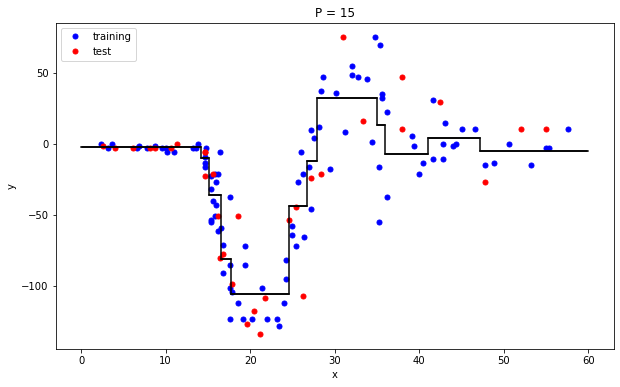

In [11]:
#
left_borders = np.arange(minimum_value, maximum_value, 0.01)
right_borders = np.arange(minimum_value + 0.01, maximum_value + 0.01, 0.01)
y_hat2 = prediction(data_interval, y_hat, node_frequencies, node_splits, is_terminal)
# print(np.array(y_hat).shape)

plt.figure(figsize = (10, 6))
plt.plot(x_train, y_train, "b.", markersize = 10, label = "training")
plt.plot(x_test, y_test, "r.", markersize = 10, label = "test")
plt.legend(loc = "upper left")
for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [y_hat2[b], y_hat2[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [y_hat2[b], y_hat2[b + 1]], "k-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("P = 15")
plt.show()

In [12]:
y_pred = np.repeat(0, 33)
y_pred = prediction(x_test, y_pred, node_frequencies, node_splits, is_terminal)

In [13]:
# RMSE Function
def rmse(N_test, y_test, y_hat):
    return np.sqrt(np.sum((y_test - y_hat) ** 2) / N_test)

In [14]:
print("RMSE is " + str(rmse(N_test, y_test, y_pred)) + " when P is 15")

RMSE is 26.847504257351087 when P is 15


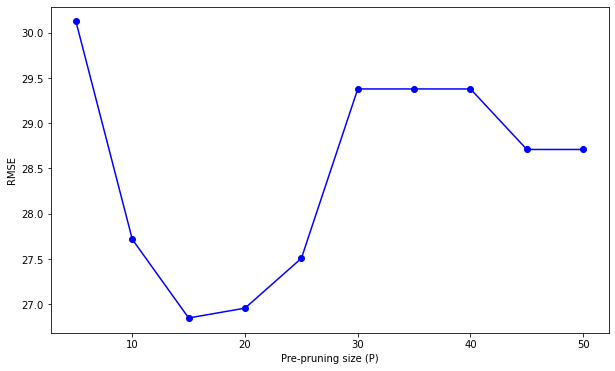

In [15]:
P = 5
P_list = []
RMSE_list = []
while P < 55:
    node_frequencies2, node_splits2, is_terminal2 = decision_tree(P)
    y_pred2 = np.repeat(0, 33)
    y_pred2 = prediction(x_test, y_pred2, node_frequencies2, node_splits2, is_terminal2)
    P_list.append(P)
    RMSE_list.append(rmse(N_test, y_test, y_pred2))
    P += 5
plt.figure(figsize = (10, 6))
plt.plot(P_list, RMSE_list, "bo-")
plt.xlabel("Pre-pruning size (P)")
plt.ylabel("RMSE")
plt.show()